In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('../data/challenge0_dataset.csv')

In [ ]:
df.head()

In [ ]:
dfx = df[df.type == 'train'].set_index('date').value
dfy = df[df.type == 'test'].set_index('date').value

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="date", y="value", data=dfx)

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [ ]:
autocorrelation_plot(dfx, )
pyplot.show()

In [ ]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')


In [ ]:
# fit model
model = ARIMA(dfx, order=(5,1,5))
model_fit = model.fit()


In [ ]:

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
print(residuals.describe())

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')


In [28]:
# split into train and test sets
X = df.values
train, test = dfx.values, dfy.values
history = [x for x in train]
predictions = list()

predicted=0.924118, expected=1.062405
predicted=0.828013, expected=2.066737
predicted=1.100573, expected=1.356173
predicted=1.043002, expected=0.250531
predicted=0.423798, expected=-0.779289
predicted=-0.247422, expected=0.092603
predicted=-0.115462, expected=0.630648
predicted=0.296797, expected=0.385119
predicted=0.312953, expected=0.445645
predicted=0.284920, expected=0.134724
predicted=0.170437, expected=0.250531
predicted=0.150666, expected=-0.274093
predicted=-0.039598, expected=0.048438
predicted=-0.021225, expected=0.134724
predicted=0.084242, expected=0.286082
predicted=0.165190, expected=2.185642
predicted=0.981430, expected=0.320301
predicted=0.628694, expected=0.002021
predicted=0.089832, expected=0.529537
predicted=0.237335, expected=0.213539
predicted=0.221642, expected=0.320301
predicted=0.197591, expected=0.092603
predicted=0.127605, expected=0.415882
predicted=0.210833, expected=0.134724
predicted=0.165698, expected=0.286082
predicted=0.167117, expected=-0.413339
predi

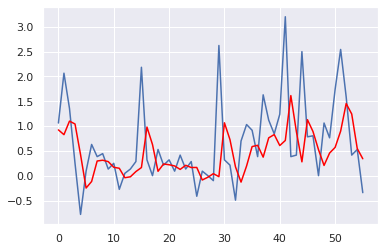

In [29]:

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,0,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()